In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
main = pd.read_csv('/Users/Klara/Desktop/statistika/SOC/SOCmain.csv')

In [2]:
main.head()

,Časová pečiatka,Pohlavie:,Vek:,"Mali ste počas Vášho štúdia na strednej/základnej škole priestor na hodinách (biológia) alebo vyhradenú hodinu, ktorá sa zaoberala zdravým sexuálnym životom, antikoncepciou, sexuálne prenosnými chorobami a ich prevenciou?",V akej podobe táto hodina bola?,Rozprávali ste sa otvorene na tému sexuálna výchova a zdravie doma?,"Myslíte si, že tému zdravý sexuálny život ovládate natoľko, že ste schopný/á viesť zdravý, plnohodnotný sexuálny život? (správna voľba antikoncepcie, prevencia sexuálne prenosných chorôb,...)",Riadite sa zásadou: prvý pohlavný styk až po svadbe?,V akom veku ste mali prvý pohlavný styk?,Aká je Vaša preferovaná forma antikoncepcie s partnerom?,"Použili ste Vy, alebo Vaša partnerka, niekedy núdzovú antikoncepciu? (,,tabletka po"" - väčšinou využívaná v prípade nechráneného pohlavného styku alebo zlyhaní antikoncepcie do 3-5 dní)","Myslíte si, že ste dostatočne informovaný/á o téme interrupcie? (ako prebiehajú, rôzne formy, legislatíva na Slovensku,...)","V súčasnosti sa na Slovensku čoraz viac diskutuje o sprísnení interrupčných práv. Súhlasíte s týmto návrhom zákona? (predĺženie čakacej doby na interrupciu z 2 na 4 dni, povinnosť dvoch znaleckých posudkov pred interrupciou zo zdravotných dôvodov, zákaz reklamy) celý návrh zákona: https://www.nrsr.sk/web/Dynamic/DocumentPreview.aspx?DocID=479948","Myslíte si, že by mala byť interrupčná tabletka legálna na Slovensku?","Poznáte niekoho z Vášho blízkeho okolia, kto podstúpil, alebo ste sama podstúpili, interrupciu?"
0,2020/12/10 10:00:11 PM SEČ,Žena,51,Nie,Vyhradená hodina v učebnom pláne na ZŠ;Vyhrade...,Skôr nie,Skôr áno,Nie,19-20,Metódy založené na znalosti plodnosti (neplodn...,Áno,Skôr nie,Nie,Áno,"Áno, poznám"
1,2020/12/10 10:05:29 PM SEČ,Žena,18,Nie,Nemal/a som žiadnu možnosť byť informovaný/á n...,Skôr áno,Skôr áno,Nie,15-16,Antikoncepčné tabletky (s alebo bez obsahu est...,Áno,Skôr áno,Nie,Áno,Nie
2,2020/12/10 10:06:02 PM SEČ,Žena,19,Nie,Výklad na hodine biológie SŠ,Nie,Skôr áno,Nie,ešte som nemal/a pohlavný styk,Nie som sexuálne aktívny/a,Nie,Skôr nie,Neviem,Áno,Nie
3,2020/12/10 10:13:00 PM SEČ,Žena,18,"Áno, jednorázovo",Výklad na hodine biológie ZŠ,Áno,Skôr áno,Nie,17-18,Prerušovaná súlož,Áno,Skôr áno,Nie,Áno,"Áno, poznám"
4,2020/12/10 10:16:03 PM SEČ,Žena,17,Nie,Nemal/a som žiadnu možnosť byť informovaný/á n...,Skôr nie,Skôr áno,Nie,ešte som nemal/a pohlavný styk,Nie som sexuálne aktívny/a,Nie,Skôr áno,Nie,Áno,Nie


In [3]:
del main['Časová pečiatka']
main.head()

,Pohlavie:,Vek:,"Mali ste počas Vášho štúdia na strednej/základnej škole priestor na hodinách (biológia) alebo vyhradenú hodinu, ktorá sa zaoberala zdravým sexuálnym životom, antikoncepciou, sexuálne prenosnými chorobami a ich prevenciou?",V akej podobe táto hodina bola?,Rozprávali ste sa otvorene na tému sexuálna výchova a zdravie doma?,"Myslíte si, že tému zdravý sexuálny život ovládate natoľko, že ste schopný/á viesť zdravý, plnohodnotný sexuálny život? (správna voľba antikoncepcie, prevencia sexuálne prenosných chorôb,...)",Riadite sa zásadou: prvý pohlavný styk až po svadbe?,V akom veku ste mali prvý pohlavný styk?,Aká je Vaša preferovaná forma antikoncepcie s partnerom?,"Použili ste Vy, alebo Vaša partnerka, niekedy núdzovú antikoncepciu? (,,tabletka po"" - väčšinou využívaná v prípade nechráneného pohlavného styku alebo zlyhaní antikoncepcie do 3-5 dní)","Myslíte si, že ste dostatočne informovaný/á o téme interrupcie? (ako prebiehajú, rôzne formy, legislatíva na Slovensku,...)","V súčasnosti sa na Slovensku čoraz viac diskutuje o sprísnení interrupčných práv. Súhlasíte s týmto návrhom zákona? (predĺženie čakacej doby na interrupciu z 2 na 4 dni, povinnosť dvoch znaleckých posudkov pred interrupciou zo zdravotných dôvodov, zákaz reklamy) celý návrh zákona: https://www.nrsr.sk/web/Dynamic/DocumentPreview.aspx?DocID=479948","Myslíte si, že by mala byť interrupčná tabletka legálna na Slovensku?","Poznáte niekoho z Vášho blízkeho okolia, kto podstúpil, alebo ste sama podstúpili, interrupciu?"
0,Žena,51,Nie,Vyhradená hodina v učebnom pláne na ZŠ;Vyhrade...,Skôr nie,Skôr áno,Nie,19-20,Metódy založené na znalosti plodnosti (neplodn...,Áno,Skôr nie,Nie,Áno,"Áno, poznám"
1,Žena,18,Nie,Nemal/a som žiadnu možnosť byť informovaný/á n...,Skôr áno,Skôr áno,Nie,15-16,Antikoncepčné tabletky (s alebo bez obsahu est...,Áno,Skôr áno,Nie,Áno,Nie
2,Žena,19,Nie,Výklad na hodine biológie SŠ,Nie,Skôr áno,Nie,ešte som nemal/a pohlavný styk,Nie som sexuálne aktívny/a,Nie,Skôr nie,Neviem,Áno,Nie
3,Žena,18,"Áno, jednorázovo",Výklad na hodine biológie ZŠ,Áno,Skôr áno,Nie,17-18,Prerušovaná súlož,Áno,Skôr áno,Nie,Áno,"Áno, poznám"
4,Žena,17,Nie,Nemal/a som žiadnu možnosť byť informovaný/á n...,Skôr nie,Skôr áno,Nie,ešte som nemal/a pohlavný styk,Nie som sexuálne aktívny/a,Nie,Skôr áno,Nie,Áno,Nie


In [81]:
main.columns = ['pohlavie','vek','hodina','akaHodina','doma','zdravySexZ','svadba','prvySex','antikoncepcia', 'tabletkaPo','interrupcie','navrh','tabletka','podstupil']

In [5]:
main['pohlavie'] = np.where((main.pohlavie == 'Žena'),str('f'),main.pohlavie)
main['pohlavie'] = np.where((main.pohlavie == 'Muž'),str('m'),main.pohlavie)

In [6]:
main['vek'] = np.where((main.vek == 'nad 50'),str('60'),main.vek)
main['vek'] = np.where((main.vek == '15 '),str('15'),main.vek)
main['vek'] = np.where((main.vek == '17 '),str('17'),main.vek)
main['antikoncepcia'] = np.where((main.antikoncepcia == 'Počkať so sexom do svadby'),str('Nie som sexuálne aktívny/a'),main.antikoncepcia)
main['navrh'] = np.where((main.navrh == 'Je mi to jedno ale skôr nie '),str('Skôr nie'),main.navrh)
main['tabletka'] = np.where((main.tabletka == 'nemám dosť info'),str('Neviem'),main.tabletka)
main['tabletka'] = np.where((main.tabletka == 'legálna ano ale nie voľne dostupná '),str('Áno'),main.tabletka)
main['tabletka'] = np.where((main.tabletka == 'Určite áno, je to jedna z možností. Pre mladých ľudí dosť častá možnosť.'),str('Áno'),main.tabletka)
main['tabletka'] = np.where((main.tabletka == 'Skôr áno ako nie'),str('Áno'),main.tabletka)
main['akaHodina'] = np.where((main.akaHodina == 'nemal som'),str('Nemal/a som žiadnu možnosť byť informovaný/á na túto tému na ZŠ ani SŠ'),main.akaHodina)
main['akaHodina'] = np.where((main.akaHodina == 'Nepamätám si;Nič'),str('Nepamätám si;Nemal/a som žiadnu možnosť byť informovaný/á na túto tému na ZŠ ani SŠ'),main.akaHodina)
main['akaHodina'] = np.where((main.akaHodina == 'Prednáška'),str('Prezentácia/výklad lekára, odborníka'),main.akaHodina)
main['akaHodina'] = np.where((main.akaHodina == 'Výklad na hodine biológie ZŠ;prednáška na ZŠ '),str('Výklad na hodine biológie ZŠ'),main.akaHodina)
main['akaHodina'] = np.where((main.akaHodina == 'Na ZŠ sme sa o tom bavili na etickej výchove, to len jednu hodinu'),str('Vyhradená hodina v učebnom pláne na ZŠ'),main.akaHodina)

In [7]:
main.head()

,pohlavie,vek,hodina,akaHodina,doma,zdravySexZ,svadba,prvySex,antikoncepcia,tabletkaPo,interrupcie,navrh,tabletka,podstupil
0,f,51,Nie,Vyhradená hodina v učebnom pláne na ZŠ;Vyhrade...,Skôr nie,Skôr áno,Nie,19-20,Metódy založené na znalosti plodnosti (neplodn...,Áno,Skôr nie,Nie,Áno,"Áno, poznám"
1,f,18,Nie,Nemal/a som žiadnu možnosť byť informovaný/á n...,Skôr áno,Skôr áno,Nie,15-16,Antikoncepčné tabletky (s alebo bez obsahu est...,Áno,Skôr áno,Nie,Áno,Nie
2,f,19,Nie,Výklad na hodine biológie SŠ,Nie,Skôr áno,Nie,ešte som nemal/a pohlavný styk,Nie som sexuálne aktívny/a,Nie,Skôr nie,Neviem,Áno,Nie
3,f,18,"Áno, jednorázovo",Výklad na hodine biológie ZŠ,Áno,Skôr áno,Nie,17-18,Prerušovaná súlož,Áno,Skôr áno,Nie,Áno,"Áno, poznám"
4,f,17,Nie,Nemal/a som žiadnu možnosť byť informovaný/á n...,Skôr nie,Skôr áno,Nie,ešte som nemal/a pohlavný styk,Nie som sexuálne aktívny/a,Nie,Skôr áno,Nie,Áno,Nie


In [118]:
main['vek'] = pd.to_numeric(main['vek'], errors='coerce')
korelacia = main
korelacia = korelacia[['vek','prvySex']]
categorical = main
ucitelka = main
# pearsonTest = main
# pearsonTest = pearsonTest[['navrh' , 'tabletka']]
skuska = main[['navrh','tabletka']]
# skuska2 = main[['interrupcie','navrh']]

In [10]:
print(korelacia.dtypes)

vek        object
prvySex    object
dtype: object


In [80]:
ucitelka.columns = ['pohlavie','vek','hodina_o_sexualnejVychove','typHodiny','rozpravali_doma_o_sexualnejVychove','ovlada_zdravySexZivot','sex_po_svadba','prvySex','antikoncepciaDruh','tabletkaPo','informovanost_o_interrupcie','navrh_o_interrupciach_Suhlas','tabletkaInterrupcnaSuhlas','PoznaAlebPodstupil_interrupciu']

In [82]:
ucitelka.to_csv('dotaznikUpraveny.csv') 

In [11]:
korelacia['vek'] = pd.to_numeric(korelacia['vek'], errors='coerce')

<ipython-input-11-49fa3a6112fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korelacia['vek'] = pd.to_numeric(korelacia['vek'], errors='coerce')


In [12]:
print(korelacia.dtypes)
korelacia

vek         int64
prvySex    object
dtype: object


,vek,prvySex
0,51,19-20
1,18,15-16
2,19,ešte som nemal/a pohlavný styk
3,18,17-18
4,17,ešte som nemal/a pohlavný styk
...,...,...
301,16,ešte som nemal/a pohlavný styk
302,17,ešte som nemal/a pohlavný styk
303,18,ešte som nemal/a pohlavný styk
304,18,ešte som nemal/a pohlavný styk


In [124]:
# indexNoSex = korelacia[korelacia['prvySex'] == 'ešte som nemal/a pohlavný styk' ].index
# korelacia.drop(indexNoSex , inplace=True)

In [13]:
len(korelacia[korelacia['prvySex'].str.contains('ešte som nemal/a pohlavný styk')])

197

In [14]:
indexNoSex = list(korelacia[korelacia['prvySex'].str.contains('ešte som nemal/a pohlavný styk')].index)

In [15]:
type(indexNoSex)

list

In [16]:
korelacia = korelacia.drop(indexNoSex)

In [17]:
korelacia

,vek,prvySex
0,51,19-20
1,18,15-16
3,18,17-18
5,19,15-16
8,18,17-18
...,...,...
276,16,15-16
285,17,17-18
287,19,17-18
291,60,17-18


In [18]:
len(korelacia)

109

In [19]:
korelacia['prvySex'] = np.where((korelacia.prvySex == '19-20'),float(19.5),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == 'do 14'),float(14.0),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == '15-16'),float(15.5),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == '17-18'),float(17.5),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == '21-25'),float(23.0),korelacia.prvySex)
korelacia['prvySex'] = np.where((korelacia.prvySex == '26 a viac'),float(26.0),korelacia.prvySex)

In [20]:
korelacia

,vek,prvySex
0,51,19.5
1,18,15.5
3,18,17.5
5,19,15.5
8,18,17.5
...,...,...
276,16,15.5
285,17,17.5
287,19,17.5
291,60,17.5


In [21]:
korelacia['prvySex'] = pd.to_numeric(korelacia['prvySex'], errors='coerce')

In [24]:
print(korelacia.dtypes)

vek          int64
prvySex    float64
dtype: object


In [25]:
korelacia

,vek,prvySex
0,51,19.5
1,18,15.5
3,18,17.5
5,19,15.5
8,18,17.5
...,...,...
276,16,15.5
285,17,17.5
287,19,17.5
291,60,17.5


# <strong><span style="color:red">Koniec nastaveni</span></strong>
---

<strong>
    Korelacia</strong>

In [22]:
# grafKorelacia = korelacia.corr()

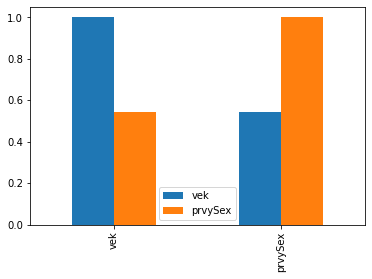

In [26]:
korelacia.corr().plot(kind='bar')

---
<strong>
    regresia</strong>

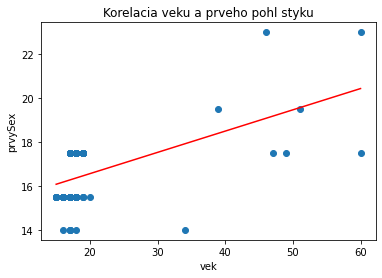

In [27]:
import matplotlib.pyplot as plt
plt.scatter(korelacia['vek'],korelacia['prvySex'])
plt.title('Korelacia veku a prveho pohl styku')
plt.xlabel('vek')
plt.ylabel('prvySex')
plt.plot(np.unique(korelacia['vek']), np.poly1d(np.polyfit(korelacia['vek'], korelacia['prvySex'], 1))(np.unique(korelacia['vek'])), color='red')

In [28]:
print(np.corrcoef(korelacia['vek'], korelacia['prvySex']))

[[1.         0.54579053]
 [0.54579053 1.        ]]


---
<strong>
    Box Plot</strong>

In [29]:
korelacia.sort_values(by=['prvySex'])

,vek,prvySex
82,17,14.0
238,34,14.0
25,18,14.0
249,17,14.0
250,17,14.0
...,...,...
138,17,17.5
167,39,19.5
0,51,19.5
235,46,23.0


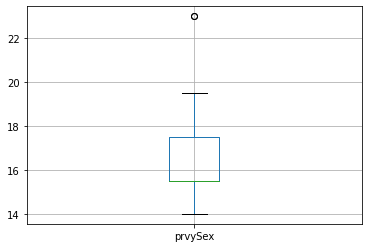

In [30]:
BPO = korelacia.boxplot(column=['prvySex'])

---
<strong>
    median</strong>

In [36]:
korelacia.median()

vek        18.0
prvySex    15.5
dtype: float64

In [37]:
korelacia.mode()

,vek,prvySex
0,18,17.5


In [38]:
korelacia.mean()

vek        19.678899
prvySex    16.532110
dtype: float64

In [52]:
categorical.dtypes

pohlavie         object
vek               int64
hodina           object
akaHodina        object
doma             object
zdravySexZ       object
svadba           object
prvySex          object
antikoncepcia    object
tabletkaPo       object
interrupcie      object
navrh            object
tabletka         object
podstupil        object
dtype: object

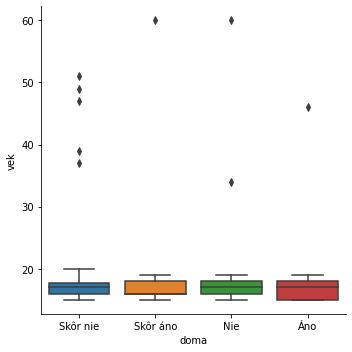

In [53]:
sns.catplot(x="doma", y="vek", kind='box', data=categorical)

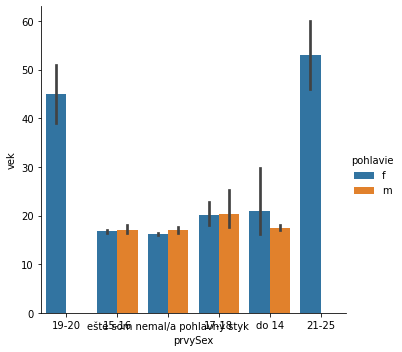

In [58]:
sns.catplot(x="prvySex", y="vek", hue="pohlavie", kind="bar", data=categorical)

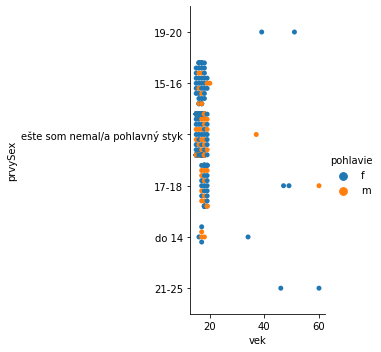

In [61]:
sns.catplot(x="vek", y="prvySex", hue="pohlavie", kind="swarm", data=categorical)

---

In [157]:
# pearsonTest['navrh'] = pearsonTest['navrh'].astype("category")
# pearsonTest['tabletka'] = pearsonTest['tabletka'].astype("category")

In [162]:
pearsonTest

,navrh,tabletka
0,Nie,Áno
1,Nie,Áno
2,Neviem,Áno
3,Nie,Áno
4,Nie,Áno
...,...,...
301,Neviem,Neviem
302,Nie,Áno
303,Neviem,Neviem
304,Neviem,Neviem


In [182]:
import scipy.stats as ss
def cramers_corrected_stat(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [183]:
confusionMatrix = pd.crosstab(pearsonTest['navrh'], pearsonTest['tabletka'])

In [184]:
confusionMatrix

tabletka,Neviem,Nie,záleži na okolnostiach,Áno
navrh,,,,
Neviem,46,6,0,27
Nie,16,5,0,100
Skôr nie,12,7,0,33
Skôr áno,7,6,1,14
Áno,1,18,0,7


In [185]:
cramers_corrected_stat(pearsonTest['navrh'], pearsonTest['tabletka'])

0.385869

In [96]:
# pearsonTest['svadba'].isnull().values.any()

False

In [112]:
# pearsonTest['gender'] = pd.to_numeric(pearsonTest['gender'], errors='coerce')
# pearsonTest['svadba'] = pearsonTest['svadba'].astype("category").cat.codes

<ipython-input-112-bc2634e2d2a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pearsonTest['gender'] = pd.to_numeric(pearsonTest['gender'], errors='coerce')
<ipython-input-112-bc2634e2d2a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pearsonTest['svadba'] = pearsonTest['svadba'].astype("category").cat.codes


In [145]:
print(pearsonTest.dtypes)

navrh       int8
tabletka    int8
dtype: object


In [186]:
# pearson = pearsonTest.corr(method='spearman')

In [187]:
# print(pearson)

Empty DataFrame
Columns: []
Index: []


In [119]:
skuska.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   navrh     306 non-null    object
 1   tabletka  306 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [121]:
skuska.tabletka.unique()

array(['Áno', 'Neviem', 'Nie', 'záleži na okolnostiach'], dtype=object)

In [122]:
skuska['navrh'] = np.where((skuska.navrh == 'Skôr áno'),str('Áno'),skuska.navrh)
skuska['navrh'] = np.where((skuska.navrh == 'Skôr nie'),str('Nie'),skuska.navrh)
skuska['tabletka'] = np.where((skuska.tabletka == 'záleži na okolnostiach'),str('Áno'),skuska.tabletka)

<ipython-input-122-0f68ed857683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skuska['navrh'] = np.where((skuska.navrh == 'Skôr áno'),str('Áno'),skuska.navrh)
<ipython-input-122-0f68ed857683>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skuska['navrh'] = np.where((skuska.navrh == 'Skôr nie'),str('Nie'),skuska.navrh)
<ipython-input-122-0f68ed857683>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [123]:
len(skuska[skuska['navrh'].str.contains('Neviem')])
indexNep = list(skuska[skuska['navrh'].str.contains('Neviem')].index)
skuska = skuska.drop(indexNep)
len(skuska[skuska['tabletka'].str.contains('Neviem')])
indexNez = list(skuska[skuska['tabletka'].str.contains('Neviem')].index)
skuska = skuska.drop(indexNez)

In [70]:
# len(skuska[skuska['zdravySexZ'].str.contains('Nezaujíma ma to')])
# indexNez = list(skuska[skuska['zdravySexZ'].str.contains('Nezaujíma ma to')].index)
# skuska = skuska.drop(indexNez)

In [71]:
# skuska['zdravySexZ'].value_counts()

ano    215
Nie     76
Name: zdravySexZ, dtype: int64

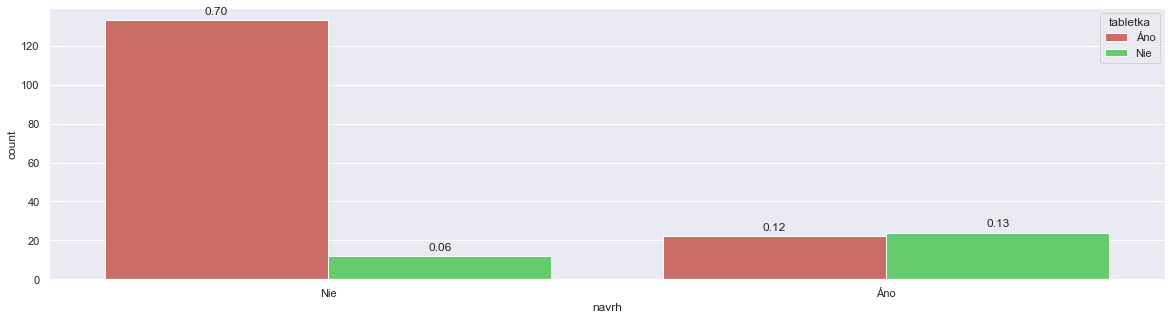

In [124]:
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.set_palette('hls',3)
fig, ax= plt.subplots(figsize=(20,5))
ax = sns.countplot(x='navrh', hue='tabletka', data=skuska)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format(height/skuska.shape[0]),
           ha='center')

In [125]:
pd.crosstab(index=skuska['navrh'],columns=skuska['tabletka'], margins=True)

tabletka,Nie,Áno,All
navrh,,,
Nie,12,133,145
Áno,24,22,46
All,36,155,191


In [126]:
ctSkuska = pd.crosstab(index=skuska['navrh'],columns=skuska['tabletka'])

In [127]:
ctSkuska

tabletka,Nie,Áno
navrh,,
Nie,12,133
Áno,24,22


In [128]:
ctSkuska.iloc[0].values

array([ 12, 133])

In [129]:
from scipy import stats
(chi2, p, dof,_) = stats.chi2_contingency([ctSkuska.iloc[0].values, ctSkuska.iloc[1].values])

In [130]:
print('chi_2 :',chi2)
print('p-val:',p)
print('deg for freedom:',dof)

chi_2 : 41.173062494290484
p-val: 1.3932954648337373e-10
deg for freedom: 1


In [43]:
skuska2['interrupcie'].value_counts()

Skôr nie           114
Skôr áno            91
Áno                 49
Nie                 45
Nezaujíma ma to      7
Name: interrupcie, dtype: int64

In [44]:
skuska2['navrh'].value_counts()

Nie         121
Neviem       79
Skôr nie     52
Skôr áno     28
Áno          26
Name: navrh, dtype: int64

In [46]:
ctSkuska2 = pd.crosstab(index=skuska2['interrupcie'],columns=skuska2['navrh'])
ctSkuska2

navrh,Neviem,Nie,Skôr nie,Skôr áno,Áno
interrupcie,,,,,
Nezaujíma ma to,7,0,0,0,0
Nie,14,18,8,2,3
Skôr nie,35,37,20,15,7
Skôr áno,19,41,15,10,6
Áno,4,25,9,1,10


In [52]:
from scipy import stats
(chi22, p2, dof2,_) = stats.chi2_contingency([ctSkuska2.iloc[0].values, ctSkuska2.iloc[1].values, ctSkuska2.iloc[2].values, ctSkuska2.iloc[3].values, ctSkuska2.iloc[4].values])

In [53]:
print('chi_2 :',chi22)
print('p-val:',p2)
print('deg for freedom:',dof2)

chi_2 : 47.943018765566976
p-val: 4.848863503912028e-05
deg for freedom: 16


In [12]:
import scipy
from scipy import stats
scipy.stats.chisquare(skuska2['interrupcie'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
skuska.